In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG19

from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers, Sequential
from keras.layers.normalization import BatchNormalization
from keras.models import Model



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 64

In [4]:
# rescale normalizes the data for the images.
# Data is split into train and validation sets
image_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split=0.2)

train_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='training'
                                             )

val_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='validation'
                                             )

Found 4264 images belonging to 2 classes.
Found 1066 images belonging to 2 classes.


In [5]:
dnn201 = tf.keras.applications.VGG19(
    include_top=False,
    input_tensor=None,
    input_shape=(224,224,3),
    weights = 'imagenet'
)

dnn201.trainable= False

global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
predictions = Dense(2, activation='softmax')

model = Sequential([
    dnn201,
    global_avg_layer,
    
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    predictions
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________

In [6]:
epochs = 20
model_hist = model.fit(train_it,
#                       validation_data=val_it)
                       epochs=epochs, )
model.save('/content/drive/MyDrive/VGG19Model')

Epoch 1/20
67/67 [==============================] - 1088s 16s/step - loss: 0.6194 - accuracy: 0.8108
Epoch 2/20
67/67 [==============================] - 80s 1s/step - loss: 0.3172 - accuracy: 0.8923
Epoch 3/20
67/67 [==============================] - 80s 1s/step - loss: 0.2355 - accuracy: 0.9115
Epoch 4/20
67/67 [==============================] - 80s 1s/step - loss: 0.2212 - accuracy: 0.9193
Epoch 5/20
67/67 [==============================] - 80s 1s/step - loss: 0.1976 - accuracy: 0.9232
Epoch 6/20
67/67 [==============================] - 80s 1s/step - loss: 0.1658 - accuracy: 0.9317
Epoch 7/20
67/67 [==============================] - 80s 1s/step - loss: 0.1766 - accuracy: 0.9338
Epoch 8/20
67/67 [==============================] - 80s 1s/step - loss: 0.1763 - accuracy: 0.9299
Epoch 9/20
67/67 [==============================] - 81s 1s/step - loss: 0.1490 - accuracy: 0.9455
Epoch 10/20
67/67 [==============================] - 79s 1s/step - loss: 0.1756 - accuracy: 0.9272
Epoch 11/20
67/6

In [7]:
results = model.evaluate(val_it)

17/17 [==============================] - 299s 19s/step - loss: 0.0871 - accuracy: 0.9662


In [9]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy'])

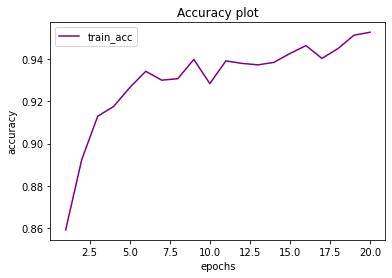

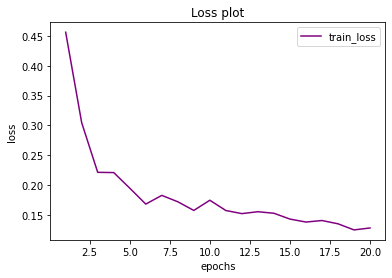

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

epochs= range(1, len(model_hist.history["accuracy"])+1)

plt.plot(epochs, model_hist.history["accuracy"], color="purple")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, model_hist.history["loss"], color="purple")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [11]:
prediction= model.predict(val_it, steps=np.ceil(val_it.samples/val_it.batch_size), verbose=2)
prediction= (prediction > 0.5)
prediction

17/17 - 17s


array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

In [12]:
val_labels=val_it.classes
val_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [13]:
prediction.shape

(1066, 2)

In [14]:
val_labels.shape

(1066,)